# Resorting to Ensembles of Learners

## Effect of more trees on a Random Forest

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import RandomForestClassifier

digits = datasets.load_digits()
X,y = digits.data, digits.target
series = [10, 25, 50, 100, 150, 200, 250, 300]
RF = RandomForestClassifier(random_state=101)
train_scores, test_scores = validation_curve(RF, 
        X, y, 'n_estimators', param_range=series,
            cv=10, scoring='accuracy',n_jobs=-1)

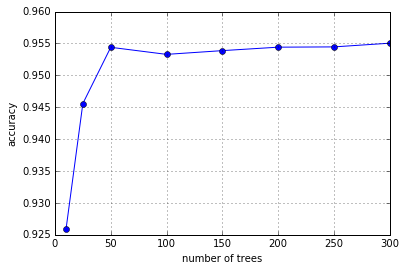

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(series, np.mean(test_scores,axis=1), '-o') 
plt.xlabel('number of trees')
plt.ylabel('accuracy')
plt.grid()
plt.show() 

# Adaboost with different base learners

In [3]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score
from sklearn import datasets
digits = datasets.load_digits()
X,y = digits.data, digits.target

DT = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(), 
                    random_state=101) ,X, y, scoring='accuracy',cv=10)
P = cross_val_score(AdaBoostClassifier(Perceptron(), random_state=101,
                    algorithm='SAMME') ,X, y, scoring='accuracy',cv=10)
NB = cross_val_score(AdaBoostClassifier(BernoulliNB(), random_state=101)
                      ,X,y,scoring='accuracy',cv=10)

print ("Decision trees: %0.3f\nPerceptron: %0.3f\nNaive Bayes: %0.3f" % 
       (np.mean(DT),np.mean(P), np.mean(NB)))

Decision trees: 0.829
Perceptron: 0.892
Naive Bayes: 0.802


# Testing Gradient boosting performance

In [4]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
from sklearn import datasets
digits = datasets.load_digits()
X,y = digits.data, digits.target

GBM = cross_val_score(GradientBoostingClassifier(n_estimators=300,
                subsample=0.8, max_depth=2, learning_rate=0.1,
                random_state=101), X, y, scoring='accuracy',cv=10)

print ("GBM: %0.3f" % (np.mean(GBM)))

GBM: 0.950
